### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the training dataset

In [2]:
credit_train = pd.read_csv('application_train.csv')

In [3]:
credit_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
credit_train.shape

(307511, 122)

The training dataset contains 307511 observations and 122 features including the TARGET(label which we will be predicting)

In [5]:
credit_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## 2. Exploratory Data Analysis

### 2.1 Target Class

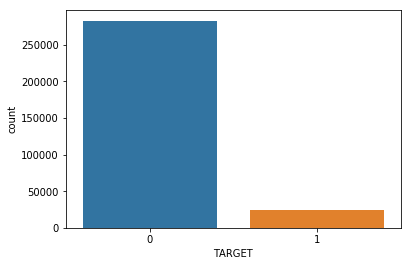

In [6]:
sns.countplot(x='TARGET', data=credit_train)

We can see that it is a highly imbalanced dataset. Thus we need to take this into consideration while model evaluation.

### 2.2 Examining the Gender distribution

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


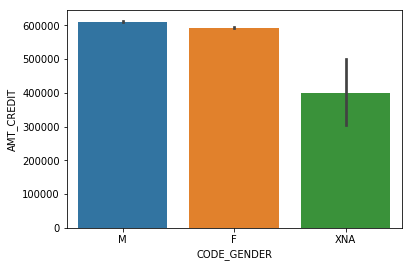

In [7]:
sns.barplot(x='CODE_GENDER', y='AMT_CREDIT',data = credit_train)

In [8]:
credit_train[credit_train['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


We can notice that for 4 transactions where the Gender value is unknown. So, I will be taking these entries off since it wouldnt matter much and would minimize the discrepancy.

In [9]:
credit_train.drop([35657,38566,83382,189640],inplace=True)

In [10]:
credit_train['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

### 2.3 Examining the Age distribution

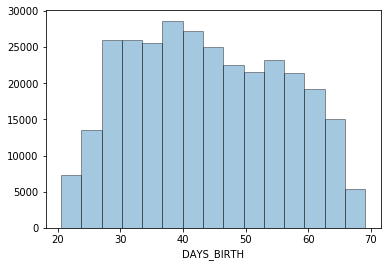

In [11]:
plt.rcParams["patch.force_edgecolor"] = True    # This makes the edge color apparent as black
sns.distplot(credit_train['DAYS_BIRTH']/(-365), bins=15, kde = False,hist_kws=dict(edgecolor="k", linewidth=1))

### 2.4 Examining the Missing values

In [12]:
missing = credit_train.isna().mean().round(4)*100 
missing[missing>40]       # Identifying the columns with greater than 40% missing data

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.36
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

There are a lot of columns with missing data. Thus, deleting these columns would not be the best strategy. We would select suitable imputational techniques later to implement our machine learning models in it.

### 2.5 Examining the Credit Amt based on income class

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

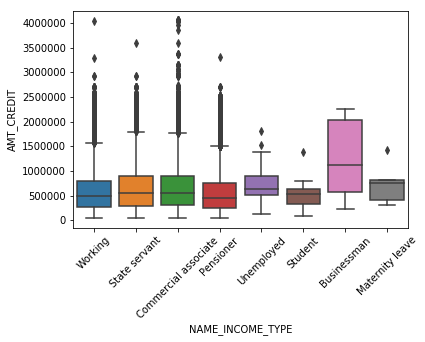

In [13]:
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_CREDIT',data=credit_train)
plt.xticks(rotation = 45)

We can see that the interquartile range and median for the Businessman is highest with respect to the other categories. It makes sense too since, businessmen tend to borrow money in higher amounts for their business expansion compared to other profession who would just be borrowing to cover for their personal expenses (in general cases).

There are also a lot of outliers in the initial 4 working classes, i.e. Working, State Servent, Commercial Associate, Pensioner.

### 2.6 Examining the Days Employed

In [14]:
credit_train['DAYS_EMPLOYED'].describe()

count    307507.000000
mean      63815.929208
std      141276.472519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

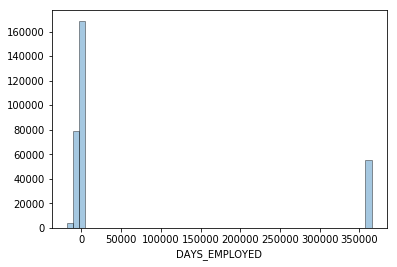

In [15]:
sns.distplot(credit_train['DAYS_EMPLOYED'],kde=False)

We can see that there is a discrepancy in the data. The days of employed cannot be more than 350000 days which is equivalent to 1000 years. We can keep these outliers aside.

In [16]:
anom = credit_train[credit_train['DAYS_EMPLOYED'] == 365243]
non_anom = credit_train[credit_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Surprisingly, it turns out that the anomalies have lower rate of default

To tackle the anomaly isssue, I would replace the missing value with np.nan and later select a suitable imputation method before apply machine learning models. Since all the anomalies have the same values, I would impute with the same value for all the transactions in case all of these loans share something in common.

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Days Employment Histogram')

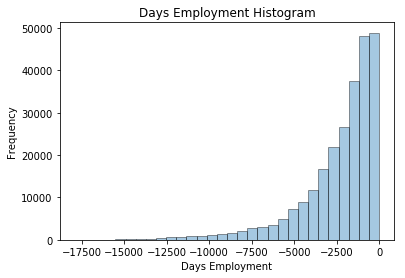

In [17]:
# Create an anomalous flag column
credit_train['DAYS_EMPLOYED_ANOM'] = credit_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
credit_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

sns.distplot(credit_train['DAYS_EMPLOYED'], bins=30,kde=False)
plt.xlabel('Days Employment')
plt.ylabel('Frequency')
plt.title('Days Employment Histogram')

The distribution looks much more inline with what we would expect.

#### One hot encoding and Label encoder

In [18]:
# Number of each type of column
credit_train.dtypes.value_counts()

float64    66
int64      40
object     16
bool        1
dtype: int64

In [19]:
# Number of unique classes in each object column
credit_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [20]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

In [21]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in credit_train:
    if credit_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(credit_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(credit_train[col])
            # Transform the training data
            credit_train[col] = le.transform(credit_train[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [22]:
credit_train = pd.get_dummies(credit_train)

In [23]:
print("The shape of the credit_train: {}".format(credit_train.shape))

The shape of the credit_train: (307507, 242)


In [24]:
credit_corr = credit_train.corr()

In [25]:
credit_corr['TARGET'].sort_values()

EXT_SOURCE_3                                        -0.178926
EXT_SOURCE_2                                        -0.160471
EXT_SOURCE_1                                        -0.155317
NAME_EDUCATION_TYPE_Higher education                -0.056593
NAME_INCOME_TYPE_Pensioner                          -0.046211
ORGANIZATION_TYPE_XNA                               -0.045989
DAYS_EMPLOYED_ANOM                                  -0.045989
FLOORSMAX_AVG                                       -0.044009
FLOORSMAX_MEDI                                      -0.043773
FLOORSMAX_MODE                                      -0.043231
EMERGENCYSTATE_MODE_No                              -0.042200
HOUSETYPE_MODE_block of flats                       -0.040592
AMT_GOODS_PRICE                                     -0.039647
REGION_POPULATION_RELATIVE                          -0.037225
ELEVATORS_AVG                                       -0.034202
ELEVATORS_MEDI                                      -0.033866
FLOORSMI

We can see that there are 5 significant correlations, i.e. 'EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_BIRTH'. DAY_BIRTH has the most positive correlation. The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan

In [26]:
df = credit_train[['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_BIRTH','TARGET']]

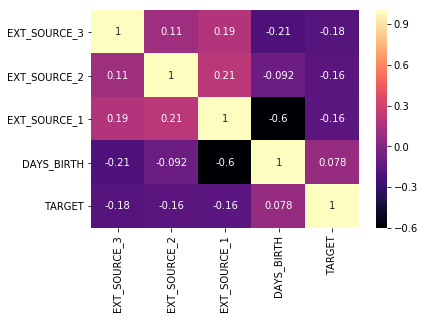

In [27]:
sns.heatmap(df.corr(),annot=True,cmap='magma')

To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target.

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


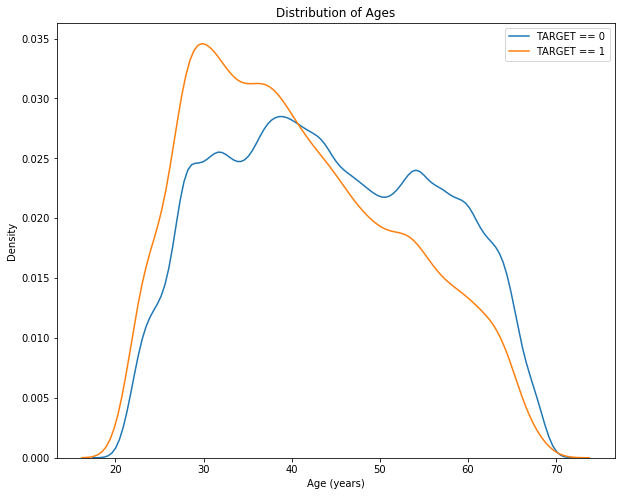

In [28]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(credit_train.loc[credit_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'TARGET == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(credit_train.loc[credit_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'TARGET == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. 

### Effect of Age on loan default

In [29]:
# Age information into a separate dataframe
age_data = credit_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"
5,0,-16941,46.413699,"(45.0, 50.0]"
6,0,-13778,37.747945,"(35.0, 40.0]"
7,0,-18850,51.643836,"(50.0, 55.0]"
8,0,-20099,55.065753,"(55.0, 60.0]"
9,0,-14469,39.641096,"(35.0, 40.0]"


In [30]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,-8532.795625,23.377522
"(25.0, 30.0]",0.111442,-10155.219690,27.822520
"(30.0, 35.0]",0.102814,-11854.848377,32.479037
"(35.0, 40.0]",0.089416,-13707.908041,37.555912
"(40.0, 45.0]",0.078491,-15497.661233,42.459346
"(45.0, 50.0]",0.074171,-17323.900441,47.462741
"(50.0, 55.0]",0.066968,-19196.494791,52.593136
"(55.0, 60.0]",0.055316,-20984.285455,57.491193
"(60.0, 65.0]",0.052737,-22780.547460,62.412459


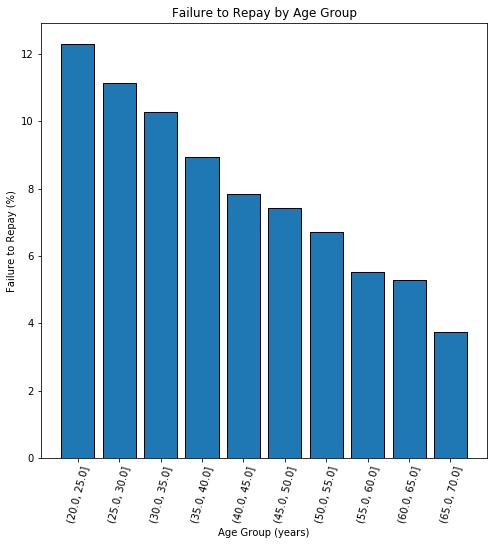

In [31]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

We can see a clear trend here that younger people belonging to age groups of 20-35 years are more likely to defualt loan (over 10% failure rate) while older people have less odds of defaulting loan.

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


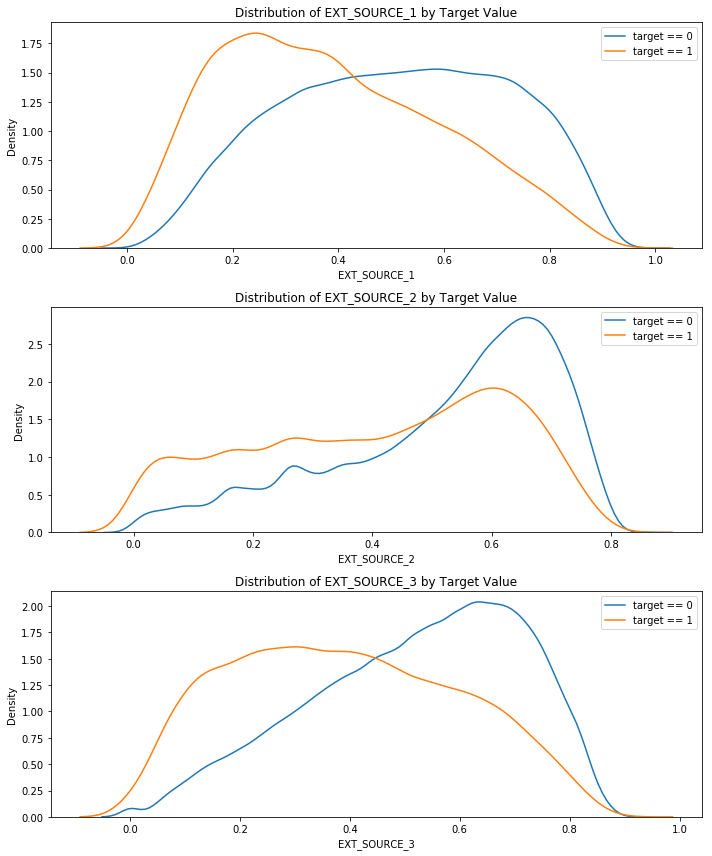

In [32]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(credit_train.loc[credit_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(credit_train.loc[credit_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
    plt.tight_layout()

The EXT_SOURCE_3 shows the greatest difference in the values for the target group 0 and 1.

In [33]:
training_set = credit_train.copy()
labels = credit_train['TARGET']
credit_train.drop('TARGET',axis =1, inplace=True)

In [34]:
credit_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Fit on the training data
imputer.fit(credit_train)

# Transform both training and testing data
train = pd.DataFrame(imputer.transform(credit_train), columns=credit_train.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Repeat with the scaler
scaler.fit(train)
train = pd.DataFrame(scaler.transform(train), columns=credit_train.columns)

print('Training data shape: ', train.shape)

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Training data shape:  (307507, 241)


In [37]:
# Keeping the highly corelated features in the dataframe
train = train[['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_BIRTH']]

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the dataset in 85:15 ratio
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.15)

In [39]:
train.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH
0,0.155054,0.307542,0.072215,0.888839
1,0.597163,0.727773,0.312933,0.477114
2,0.814130,0.650190,0.518318,0.348534
3,0.597163,0.760751,0.518318,0.350846
4,0.597163,0.377472,0.518318,0.298591


### Model 1: Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [49]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(penalty='l2', C=1000)

# Train on the training data
log_reg.fit(X_train, y_train)

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [52]:
print(confusion_matrix(y_test,log_reg_pred))
print(classification_report(y_test,log_reg_pred))

[[42369    23]
 [ 3724    11]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42392
           1       0.32      0.00      0.01      3735

   micro avg       0.92      0.92      0.92     46127
   macro avg       0.62      0.50      0.48     46127
weighted avg       0.87      0.92      0.88     46127



### Model 2: Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100,random_state = 50, verbose = 1, n_jobs = -1)

In [55]:
# Train on the training data
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
features = list(X_train.columns)
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [56]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[42121   271]
 [ 3614   121]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     42392
           1       0.31      0.03      0.06      3735

   micro avg       0.92      0.92      0.92     46127
   macro avg       0.61      0.51      0.51     46127
weighted avg       0.87      0.92      0.88     46127



### Model 3: Light GBM

In [58]:
import lightgbm as lgb

In [59]:
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

In [65]:
model.fit(X_train, y_train, eval_metric = 'auc',
                  eval_set = (X_test, y_test), early_stopping_rounds = 100, verbose = 200)

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.723823	valid_0's binary_logloss: 0.592974
Early stopping, best iteration is:
[156]	valid_0's auc: 0.724269	valid_0's binary_logloss: 0.594844


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.05,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=50, reg_alpha=0.1, reg_lambda=0.1,
        silent=True, subsample=0.8, subsample_for_bin=200000,
        subsample_freq=0)

In [61]:
pred = model.predict(X_test)

In [63]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     42392
           1       0.15      0.63      0.25      3735

   micro avg       0.69      0.69      0.69     46127
   macro avg       0.55      0.66      0.53     46127
weighted avg       0.89      0.69      0.76     46127

[[29452 12940]
 [ 1392  2343]]
